In [1]:
from src.CipherBreaker import CipherBreaker
from src.CipherUtils import (
    TextDecoder,
    TextEncoder,
    CipherGenerator,
    TextPreProcessor,
)
from src.ProbabilityMatrix import ProbabilityMatrix

In [2]:
# create instances of my beautiful classes

cipher_generator = CipherGenerator()
preprocess = TextPreProcessor()
text_encoder = TextEncoder()
text_decoder = TextDecoder()

In [3]:
# List of text file paths to build our corpus (where we learn the transitions probs)

file_paths = [
    "texts/moby_dick.txt",
    "texts/shakespeare.txt",
    "texts/james-joyce-a-portrait-of-the-artist-as-a-young-man.txt",
    "texts/james-joyce-dubliners.txt",
    "texts/james-joyce-ulysses.txt",
]

texts = []
for file_path in file_paths:
    with open(file_path, "r") as file:
        texts.append(file.read())

corpus = "".join(texts)

In [4]:
# preprocess the text, removing extra-characters

corpus = preprocess.lower(corpus)
unknown_chars = preprocess.unknown_chars(corpus)
# print(unknown_chars)
corpus = preprocess.remove_unknown_chars(corpus, unknown_chars=unknown_chars)
corpus = preprocess.remove_additional_spaces(corpus)

preprocess.save_text(
    corpus
)  # save text after preprocessing inside text_preprocessed.txt

In [5]:
# compute the transition probs

probability_matrix = ProbabilityMatrix(corpus)
probability_matrix.compute_probability_table()

In [6]:
min(probability_matrix.probability_table.values())

1.2227497980017334e-07

In [7]:
probability_matrix.save_all_2_chars()
probability_matrix.save_probability_table()

In [8]:
# some text to try

text = "There were better sense in the sad mechanic exercise of determining the reason of its absence where it is not. In the novels of the last hundred years there are vast numbers of young ladies with whom it might be a pleasure to fall in love; there are at least five with whom, as it seems to me, no man of taste and spirit can help doing so."
text = "I do not believe a word of it, my dear. If he had been so very agreeable, he would have talked to Mrs. Long. But I can guess how it was"
text = "Your plan is a good one,” replied Elizabeth, “where nothing is in question but the desire of being well married; and if I were determined to get a rich husband, or any husband, I dare say I should adopt it. But these are not Jane’s feelings"
# text = "she is not acting by design. As yet she cannot even be certain of the degree of her own regard, nor of its reasonableness. She has known him only a fortnight. She danced four dances with him at Meryton; she saw him one morning at his own house, and has since dined in company with him four times."

In [9]:
# encode and decode a sample text with a generated cipher

text = preprocess.lower(text)
text = preprocess.remove_unknown_chars(
    text, unknown_chars=preprocess.unknown_chars(text)
)
text = preprocess.remove_additional_spaces(text)


cipher = cipher_generator.generate_cipher()

encoded_text = text_encoder.encode_text(text, cipher)
decoded_text = text_decoder.decode_text(encoded_text, cipher)

print("Original Text:", text)
print("Encoded Text:", encoded_text)
print("Decoded Text:", decoded_text)

Original Text: your plan is a good one replied elizabeth where nothing is in question but the desire of being well married and if i were determined to get a rich husband or any husband i dare say i should adopt it but these are not jane s feelings
Encoded Text: myhf rxcg sv c qyyn ygu furxsun uxsbceuio doufu gyiosgq sv sg phuvisyg ehi iou nuvsfu yl eusgq duxx wcffsun cgn sl s dufu nuiufwsgun iy qui c fsko ohvecgn yf cgm ohvecgn s ncfu vcm s voyhxn cnyri si ehi iouvu cfu gyi tcgu v luuxsgqv
Decoded Text: your plan is a good one replied elizabeth where nothing is in question but the desire of being well married and if i were determined to get a rich husband or any husband i dare say i should adopt it but these are not jane s feelings


In [11]:
# break the cipher with MCMC

cipher_breaker = CipherBreaker(
    starting_cipher=cipher_generator.generate_cipher(),
    ciphered_text=encoded_text,
    probability_table=probability_matrix.probability_table,
)

cipher_breaker.break_cipher(iterations=100000, print_interval=100)

Iter 0: gawi qznr dl n jaao ark ikqzdko kzdsnxktb vbkik ratbdrj dl dr fwkltdar xwt tbk okldik au xkdrj vkzz eniidko nro du d vkik oktkiedrko ta jkt n idcb bwlxnro ai nrg bwlxnro d onik lng d lbawzo noaqt dt xwt tbklk nik rat mnrk l ukkzdrjl
Iter 100: your flan is a good one reflied eliqaceth where nothing is in juestion cut the desire om ceing well parried and im i were deterpined to get a rivh huscand or any huscand i dare say i should adoft it cut these are not bane s meelings
Iter 200: your flan is a good one reflied elixaceth where nothing is in buestion cut the desire ok ceing well married and ik i were determined to get a rivh huscand or any huscand i dare say i should adoft it cut these are not pane s keelings
Iter 300: your plan is a good one replied elicameth where nothing is in buestion mut the desire of meing well varried and if i were detervined to get a rijh husmand or any husmand i dare say i should adopt it mut these are not qane s feelings
Iter 400: your plan is a good 

['c',
 'p',
 'e',
 'n',
 'u',
 'b',
 'q',
 'o',
 's',
 'z',
 'l',
 'x',
 'w',
 'g',
 'y',
 'r',
 't',
 'f',
 'v',
 'i',
 'h',
 'k',
 'd',
 'a',
 'm',
 'j']

In [12]:
cipher_breaker.extract_best(
    n_extract=10, return_likelihood=True
)  # Extract the best 10 decoded messages along with their likelihood

[('your plan is a good one replied elikaceth where nothing is in buestion cut the desire of ceing well married and if i were determined to get a rivh huscand or any huscand i dare say i should adopt it cut these are not qane s feelings',
  -1182.3732445524508),
 ('your plan is a good one replied elicameth where nothing is in buestion mut the desire of meing well karried and if i were deterkined to get a rivh husmand or any husmand i dare say i should adopt it mut these are not qane s feelings',
  -1182.5028668863679),
 ('your plan is a good one replied elikameth where nothing is in buestion mut the desire of meing well carried and if i were detercined to get a rivh husmand or any husmand i dare say i should adopt it mut these are not qane s feelings',
  -1182.605011015243),
 ('your plan is a good one replied elikameth chere nothing is in buestion mut the desire of meing cell warried and if i cere deterwined to get a rivh husmand or any husmand i dare say i should adopt it mut these are

MovieWriter imagemagick unavailable; using Pillow instead.


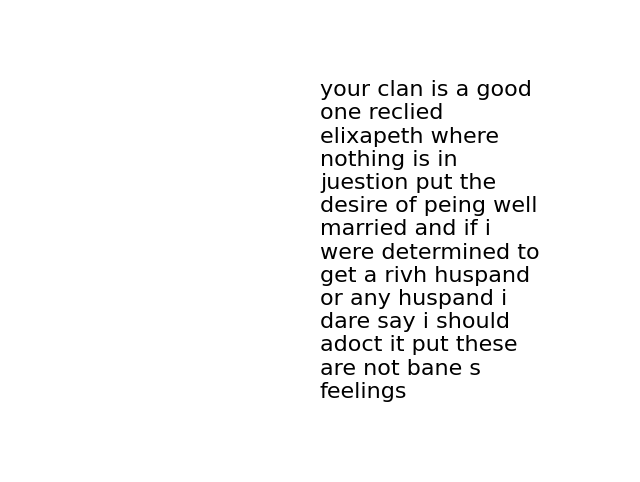

In [14]:
cipher_breaker.generate_animation(filename="your plan.gif")